In [41]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import linear_model

#from sklearn.impute import SimpleImputer
#from sklearn.preprocessing import OrdinalEncoder
#from sklearn.preprocessing import OneHotEncoder

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fastfood-nutrition/fastfood.csv


In [4]:
kentucky_data=pd.read_csv('/kaggle/input/fastfood-nutrition/fastfood.csv')
X_test_full= pd.read_csv('/kaggle/input/fastfood-nutrition/fastfood.csv')
kentucky_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515 entries, 0 to 514
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   restaurant   515 non-null    object 
 1   item         515 non-null    object 
 2   calories     515 non-null    int64  
 3   cal_fat      515 non-null    int64  
 4   total_fat    515 non-null    int64  
 5   sat_fat      515 non-null    float64
 6   trans_fat    515 non-null    float64
 7   cholesterol  515 non-null    int64  
 8   sodium       515 non-null    int64  
 9   total_carb   515 non-null    int64  
 10  fiber        503 non-null    float64
 11  sugar        515 non-null    int64  
 12  protein      514 non-null    float64
 13  vit_a        301 non-null    float64
 14  vit_c        305 non-null    float64
 15  calcium      305 non-null    float64
 16  salad        515 non-null    object 
dtypes: float64(7), int64(7), object(3)
memory usage: 68.5+ KB


In [5]:
kentucky_data.describe()

,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium
count,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,515.000000,503.000000,515.000000,514.000000,301.000000,305.000000,305.000000
mean,530.912621,238.813592,26.590291,8.153398,0.465049,72.456311,1246.737864,45.664078,4.137177,7.262136,27.891051,18.857143,20.170492,24.852459
std,282.436147,166.407510,18.411876,6.418811,0.839644,63.160406,689.954278,24.883342,3.037460,6.761301,17.683921,31.384330,30.592243,25.522073
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,330.000000,120.000000,14.000000,4.000000,0.000000,35.000000,800.000000,28.500000,2.000000,3.000000,16.000000,4.000000,4.000000,8.000000
50%,490.000000,210.000000,23.000000,7.000000,0.000000,60.000000,1110.000000,44.000000,3.000000,6.000000,24.500000,10.000000,10.000000,20.000000
75%,690.000000,310.000000,35.000000,11.000000,1.000000,95.000000,1550.000000,57.000000,5.000000,9.000000,36.000000,20.000000,30.000000,30.000000
max,2430.000000,1270.000000,141.000000,47.000000,8.000000,805.000000,6080.000000,156.000000,17.000000,87.000000,186.000000,180.000000,400.000000,290.000000


In [24]:
kentucky_data.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [28]:
kentucky_data.isnull().sum()

restaurant       0
item             0
calories         0
cal_fat          0
total_fat        0
sat_fat          0
trans_fat        0
cholesterol      0
sodium           0
total_carb       0
fiber           12
sugar            0
protein          1
vit_a          214
vit_c          210
calcium        210
salad            0
dtype: int64

<AxesSubplot: xlabel='calories', ylabel='restaurant'>

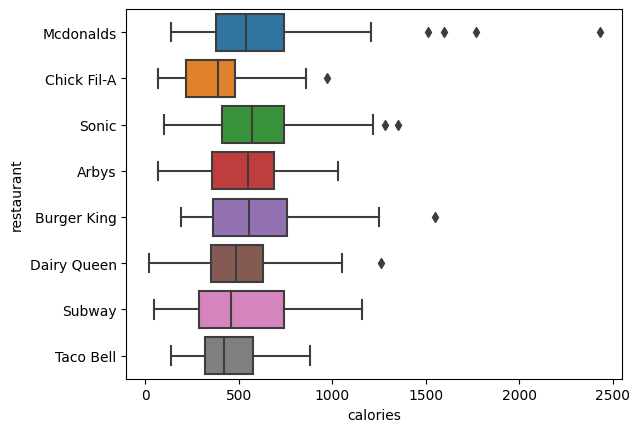

In [26]:
#on observe la distribution de la variable 'total_fat' par restaurant
sns.boxplot(x=kentucky_data['calories'],y=kentucky_data['restaurant'])

<AxesSubplot: title={'center': 'Calories/TotalFat'}, xlabel='total_fat', ylabel='calories'>

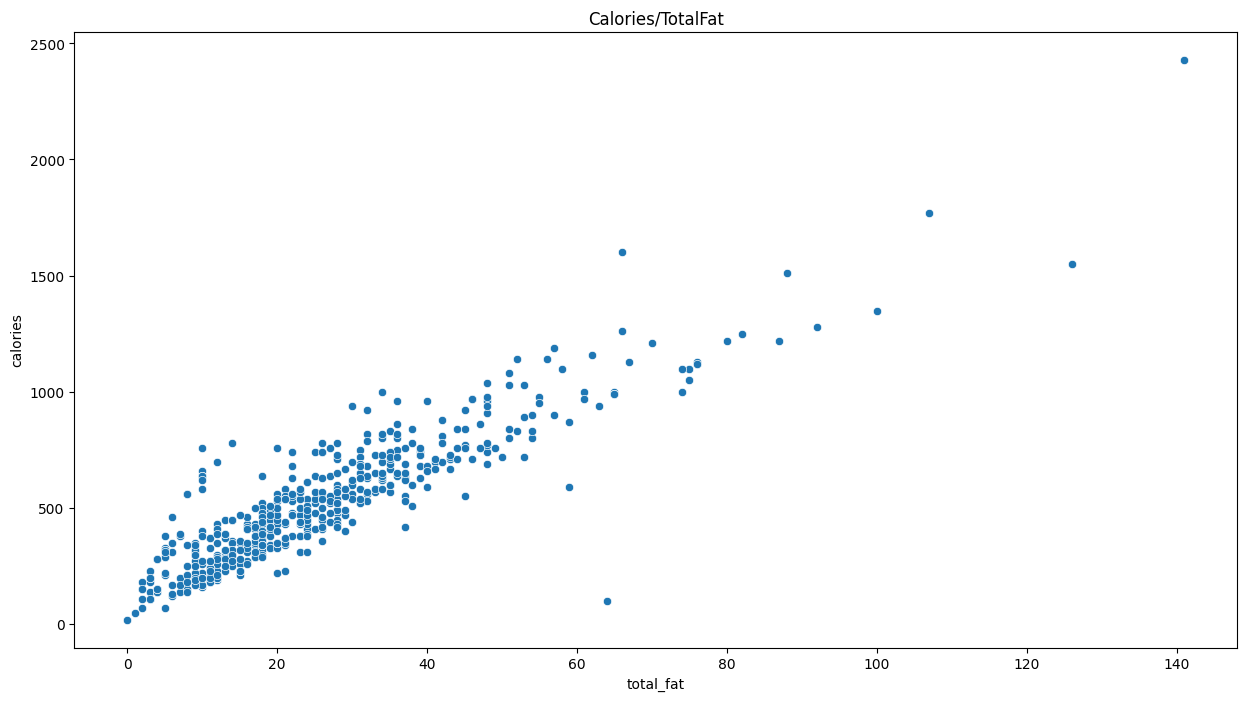

In [8]:
# On s'interesse maintenant à la corrélation entre la quantité de graisse contenue dans un aliment 'total_fat' et les calories de celui-ci 
plt.figure(figsize=(15,8))
plt.title("Calories/TotalFat")
sns.scatterplot(y=kentucky_data['calories'],x=kentucky_data['total_fat'])

In [45]:
# A partir de ce graphique on peut faire l'hypothèse d'un corrélation entre 'total_fat' et 'calories', ce qui parait logique
# Calculons le coeff de  corrélation linéaire 
r = stats.pearsonr(kentucky_data['total_fat'],kentucky_data['calories'])
print('(Statistic, p-value)')
print(r)
#On observe que les éléments sont dépendants ( coeff de correlation linéaire proche de 1) et qu'on peut rejeter l'hypothèse nulle ( p value très inférieure à 0.05)

(Statistic, p-value)
(0.9004936961298489, 1.1746550426270152e-187)


In [10]:
#Objectif : à partir de la quantité de certains nutriments d'un aliment, prédire le nombre de calories que cet aliment aura
y = kentucky_data.calories

In [11]:
# Creating features 
features = ["total_fat","cholesterol","sodium","sugar"]
X = kentucky_data[features]
X.shape

(515, 4)

In [12]:
# Split into validation and training data, on garde 80 % de données pour l'entrainement et 20 % pour les tests 
train_X, valid_X, train_y, valid_y = train_test_split(X, y,train_size=0.8,test_size=0.2, random_state=0)

In [ ]:
#Bien que la régression linéaire semble être tout indiquée pour ce genre de problème, on testera ici 3 modèles :
# La régression linéaire
# Arbre de décision
# Le random Forest

In [13]:
# On effectue une régression linéaire
kentucky_model_regr = linear_model.LinearRegression()
kentucky_model_regr.fit(train_X, train_y)
pred_regr= kentucky_model_regr.predict(valid_X)
print('Calories prédites par régression linéaire')
print(kentucky_model_regr.predict(valid_X.head()))

Calories prédites par régression linéaire
[ 414.45479486 1090.80639705 1210.27475613 1122.21375984  354.46909241]


In [14]:
kentucky_model_tree= DecisionTreeRegressor(random_state=0)
kentucky_model_tree.fit(train_X,train_y)
pred_tree = kentucky_model_tree.predict(valid_X)

print('Predictions ces 5 aliments:')
print(X.head())
print('Calories prédites par DecisionTree :')
print(kentucky_model_tree.predict(valid_X.head()))

Predictions ces 5 aliments:
   total_fat  cholesterol  sodium  sugar
0          7           95    1110     11
1         45          130    1580     18
2         67          220    1920     18
3         31          155    1940     18
4         45          120    1980     18
Calories prédites par DecisionTree :
[ 400. 1120. 1260. 1000.  340.]


In [15]:
kentucky_model_forest = RandomForestRegressor(random_state=1)
kentucky_model_forest.fit(train_X, train_y)
pred_forest = kentucky_model_forest.predict(valid_X)
print(kentucky_model_forest.predict(valid_X.head()))

[ 389.7 1123.5 1211.1  946.3  343.5]


In [16]:
# On calcule le MAE ( mean average error) pour chaque model
mae_regr= mean_absolute_error(valid_y,pred_regr)
mae_tree=mean_absolute_error(valid_y,pred_tree)
mae_forest=mean_absolute_error(valid_y,pred_forest)

print('MAE RegressionL:',mae_regr)
print('MAE Tree:',mae_tree)
print('MAE Forest:',mae_forest)

MAE RegressionL: 52.23485705689909
MAE Tree: 72.71844660194175
MAE Forest: 60.643558609675125


In [17]:
#On constate que le modèle de régression linéaire est le plus adapté ( et de loin!)
#Cependant on peut chercher à voir si en ajustant au mieux les modèles de foret et d'arbres, on peut diminuer assez la MAE pour que ces modèles soient compétitifs 

In [18]:
#Amelioration du modèle d'arbre : 
#On chercher à trouver le nombre optimal de feuille:
#a-on définit une fonction pour pouvoir boucler facilement 
def tree_score_dataset(max_leaf_nodes, valid_X, train_y, valid_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds = model.predict(valid_X)
    return mean_absolute_error(valid_y, preds)
#b-on effectue la boucle
mae_tree_opt=[]
i=1
while i <= 100:
    i+=1
    mae_tree_opt.append(tree_score_dataset(i, valid_X, train_y, valid_y))
optimal_tree_mae=min(mae_tree_opt)
optimal_tree_mae_index=mae_tree_opt.index(min(mae_tree_opt))+1
print(optimal_tree_mae,optimal_tree_mae_index)

66.27470920509134 29


In [35]:
#Amelioration du modèle de foret : 
#Même principe que pour l'arbre, on va définir une fonction et boucler dessus:
    #En paramétrant uniquement la profondeur
def forest_score_depth(max_depth,train_X,valid_X, train_y, valid_y):
    model = RandomForestRegressor(n_estimators=100,max_depth=max_depth,random_state=0)
    model.fit(train_X, train_y)
    preds = model.predict(valid_X)
    return mean_absolute_error(valid_y, preds)
mae_forest_opt_depth=[]
i=1
while i<=15:
    mae_forest_opt_depth.append(forest_score_depth(i,train_X,valid_X, train_y, valid_y))
    i+=1
optimal_forest_mae_depth=min(mae_forest_opt_depth)
optimal_forest_mae_depth_index=mae_forest_opt_depth.index(min(mae_forest_opt_depth))
print(optimal_forest_mae_depth,optimal_forest_mae_depth_index)

58.2660647599657 10


In [36]:
def forest_score_estimators(n_estimators,train_X,valid_X, train_y, valid_y):
    model = RandomForestRegressor(n_estimators=n_estimators,max_depth=9,random_state=0)
    model.fit(train_X, train_y)
    preds = model.predict(valid_X)
    return mean_absolute_error(valid_y, preds)
mae_forest_opt_estim=[]
j=1
while j<30:
    j+=1
    mae_forest_opt_estim.append(forest_score_estimators(j,train_X,valid_X, train_y, valid_y))
optimal_forest_mae_estim=min(mae_forest_opt_estim)
optimal_forest_mae_estim_index=mae_forest_opt_estim.index(min(mae_forest_opt_estim))+1
print(optimal_forest_mae_estim,optimal_forest_mae_estim_index)

56.92096387608849 17


In [40]:
mae_forest_diff=mae_forest-optimal_forest_mae_estim
print('En choissant une profondeur d\'arbre de 9 et un nombre d\'arbre de 17, la MAE est réduite de :')
print(mae_forest_diff)
print('Soit une amélioration de:',(mae_forest_diff/mae_forest)*100,'%')

En choissant une profondeur d'arbre de 9 et un nombre d'arbre de 17, la MAE est réduite de :
3.7225947335866323
Soit une amélioration de: 6.1384833260637945 %


In [ ]:
#Mais cela reste signicativement supérieur à la MAE obtenue par Régression Linéaire, on gardera donc ce modèle